In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, feature_selection, linear_model, metrics, ensemble, tree
import sklearn as sklearn
import plotly.express as px
import keras

Using TensorFlow backend.
D:\AI\lib\importlib\_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject



In [41]:
train=pd.read_csv('train_loan.csv')
test=pd.read_csv('test_loan.csv')

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [43]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [44]:
def isnull(df, features):
    for features in features:
        if df[features].isnull().sum()>1:
            print(f'feature {features} has null values : {df[features].isnull().sum()}')

In [45]:
isnull(train, train.columns)

feature Gender has null values : 13
feature Married has null values : 3
feature Dependents has null values : 15
feature Self_Employed has null values : 32
feature LoanAmount has null values : 22
feature Loan_Amount_Term has null values : 14
feature Credit_History has null values : 50


In [63]:
def ValueCountsPlot(plot,df, features):
    for features in features:
        if df[features].nunique()<20 and features not in 'Loan_ID':
            print(f'feature {features} has value counts: {df[features].value_counts()} and null values is {df[features].isnull().sum()} and unique features:{features, df[features].unique()} total unique features: {df[features].nunique()}')
            if df[features].isnull().sum()>0:
                x=df[features].dropna().unique()
                h=df[features].value_counts()
                plot(x, h)
                plt.xlabel(features)
                plt.show()

feature Gender has value counts: Male      489
Female    112
Name: Gender, dtype: int64 and null values is 13 and unique features:('Gender', array(['Male', 'Female', nan], dtype=object)) total unique features: 2


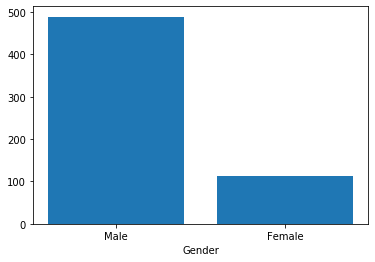

feature Married has value counts: Yes    398
No     213
Name: Married, dtype: int64 and null values is 3 and unique features:('Married', array(['No', 'Yes', nan], dtype=object)) total unique features: 2


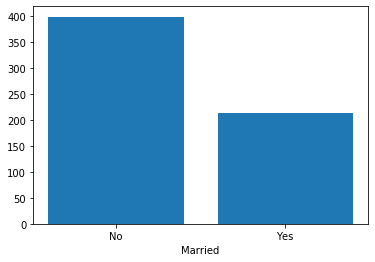

feature Dependents has value counts: 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 and null values is 15 and unique features:('Dependents', array(['0', '1', '2', '3+', nan], dtype=object)) total unique features: 4


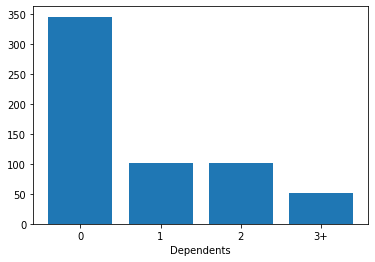

feature Education has value counts: Graduate        480
Not Graduate    134
Name: Education, dtype: int64 and null values is 0 and unique features:('Education', array(['Graduate', 'Not Graduate'], dtype=object)) total unique features: 2
feature Self_Employed has value counts: No     500
Yes     82
Name: Self_Employed, dtype: int64 and null values is 32 and unique features:('Self_Employed', array(['No', 'Yes', nan], dtype=object)) total unique features: 2


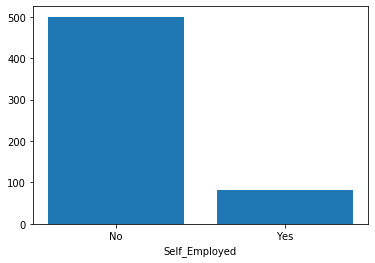

feature Loan_Amount_Term has value counts: 360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64 and null values is 14 and unique features:('Loan_Amount_Term', array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])) total unique features: 10


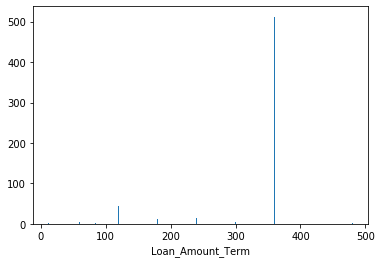

feature Credit_History has value counts: 1.0    475
0.0     89
Name: Credit_History, dtype: int64 and null values is 50 and unique features:('Credit_History', array([ 1.,  0., nan])) total unique features: 2


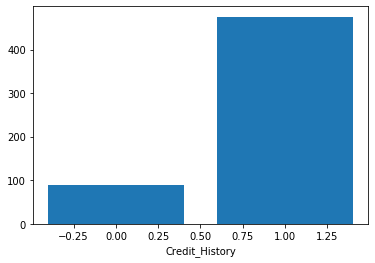

feature Property_Area has value counts: Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64 and null values is 0 and unique features:('Property_Area', array(['Urban', 'Rural', 'Semiurban'], dtype=object)) total unique features: 3
feature Loan_Status has value counts: Y    422
N    192
Name: Loan_Status, dtype: int64 and null values is 0 and unique features:('Loan_Status', array(['Y', 'N'], dtype=object)) total unique features: 2


In [64]:
ValueCountsPlot(plt.bar, train, train.columns)

In [81]:
isnull(test, test.columns)

feature Gender has null values : 11
feature Dependents has null values : 10
feature Self_Employed has null values : 23
feature LoanAmount has null values : 5
feature Loan_Amount_Term has null values : 6
feature Credit_History has null values : 29


feature Gender has value counts: Male      286
Female     70
Name: Gender, dtype: int64 and null values is 11 and unique features:('Gender', array(['Male', 'Female', nan], dtype=object)) total unique features: 2


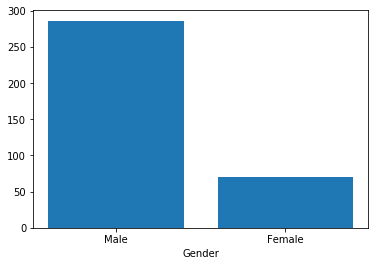

feature Married has value counts: Yes    233
No     134
Name: Married, dtype: int64 and null values is 0 and unique features:('Married', array(['Yes', 'No'], dtype=object)) total unique features: 2
feature Dependents has value counts: 0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64 and null values is 10 and unique features:('Dependents', array(['0', '1', '2', '3+', nan], dtype=object)) total unique features: 4


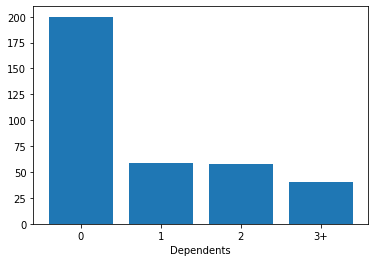

feature Education has value counts: Graduate        283
Not Graduate     84
Name: Education, dtype: int64 and null values is 0 and unique features:('Education', array(['Graduate', 'Not Graduate'], dtype=object)) total unique features: 2
feature Self_Employed has value counts: No     307
Yes     37
Name: Self_Employed, dtype: int64 and null values is 23 and unique features:('Self_Employed', array(['No', 'Yes', nan], dtype=object)) total unique features: 2


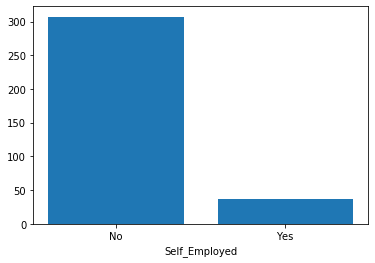

feature Loan_Amount_Term has value counts: 360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64 and null values is 6 and unique features:('Loan_Amount_Term', array([360., 240., 180.,  nan,  60., 480.,  84.,  12., 300., 350.,  36.,
       120.,   6.])) total unique features: 12


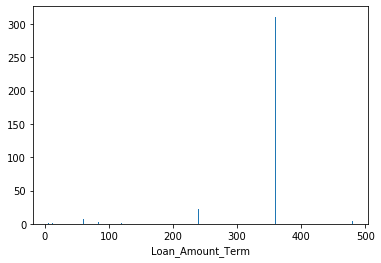

feature Credit_History has value counts: 1.0    279
0.0     59
Name: Credit_History, dtype: int64 and null values is 29 and unique features:('Credit_History', array([ 1., nan,  0.])) total unique features: 2


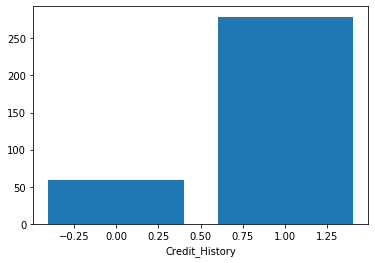

feature Property_Area has value counts: Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64 and null values is 0 and unique features:('Property_Area', array(['Urban', 'Semiurban', 'Rural'], dtype=object)) total unique features: 3


In [82]:
ValueCountsPlot(plt.bar, test, test.columns)

In [79]:
def fillna(df, features):
    print(f'total features: {len(features)}')
    for features in features:
        if df[features].nunique()<20 :
            print('categorical features:',features)
            df[features]=df[features].fillna(df[features].mode()[0])
            df[features]=preprocessing.LabelEncoder().fit_transform(df[features])
            
        elif df[features].nunique()>20 and features not in 'Loan_ID' :
            print('numerical features:',features)
            df[features]=df[features].fillna(df[features].median())
            
        print(f'null values: {df[features].isnull().sum()}')
            

In [80]:
fillna(train, train.columns)

total features: 13
null values: 0
categorical features: Gender
null values: 0
categorical features: Married
null values: 0
categorical features: Dependents
null values: 0
categorical features: Education
null values: 0
categorical features: Self_Employed
null values: 0
numerical features: ApplicantIncome
null values: 0
numerical features: CoapplicantIncome
null values: 0
numerical features: LoanAmount
null values: 0
categorical features: Loan_Amount_Term
null values: 0
categorical features: Credit_History
null values: 0
categorical features: Property_Area
null values: 0
categorical features: Loan_Status
null values: 0


In [85]:
X=train.drop(['Loan_ID','Loan_Status'], axis=1)
x=test[X.columns]
y=train.Loan_Status

In [88]:
def train_val_split(X,y):
    global X_train, X_val,y_train, y_val
    X_train, X_val,y_train, y_val=model_selection.train_test_split(X,y, test_size=0.2, random_state=0)
    print(X_train.shape, X_val.shape,y_train.shape, y_val.shape)    

In [90]:
train_val_split(X,y)

(491, 11) (123, 11) (491,) (123,)


In [94]:
y_train

90     1
533    0
452    0
355    1
266    1
      ..
277    1
9      0
359    1
192    0
559    1
Name: Loan_Status, Length: 491, dtype: int64

In [139]:
def modelPredict(model, X_train, y_train):
    model.fit(X_train, y_train)
    print(f'score: {model.score(X_train, y_train)}')
    print(f'val score: {model.score(X_val, y_val)}')
    print(f'total score: {model.score(X,y)}')
    print(f'acc val score: {metrics.accuracy_score( y_val, model.predict(X_val))}')
    print(f'classification report val score: {metrics.classification_report( y_val, model.predict(X_val))}')
                
    print(f'confusion matrix total score: {metrics.confusion_matrix( y, model.predict(X))}')

    print(f'confusion matrix train score: {metrics.confusion_matrix( y_train, model.predict(X_train))}')
    print(f'confusion matrix val score: {metrics.confusion_matrix( y_val, model.predict(X_val))}')
    return model

In [140]:
modelPredict(linear_model.LogisticRegression(solver='newton-cg'), X_train, y_train)

score: 0.8065173116089613
val score: 0.8373983739837398
total score: 0.8127035830618893
acc val score: 0.8373983739837398
classification report val score:               precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123

confusion matrix total score: [[ 84 108]
 [  7 415]]
confusion matrix train score: [[ 69  90]
 [  5 327]]
confusion matrix val score: [[15 18]
 [ 2 88]]


LogisticRegression(solver='newton-cg')

In [112]:
modelPredict(ensemble.RandomForestClassifier(), X_train, y_train)

score: 1.0
val score: 0.7804878048780488
total score: 0.9560260586319218
acc val score: 0.7804878048780488
classification report val score:               precision    recall  f1-score   support

           0       0.64      0.42      0.51        33
           1       0.81      0.91      0.86        90

    accuracy                           0.78       123
   macro avg       0.72      0.67      0.68       123
weighted avg       0.76      0.78      0.76       123

confusion matrix total score: [[173  19]
 [  8 414]]
confusion matrix train score: [[159   0]
 [  0 332]]
confusion matrix val score: [[14 19]
 [ 8 82]]


In [114]:
modelPredict(tree.DecisionTreeClassifier(), X_train, y_train)

score: 1.0
val score: 0.6666666666666666
total score: 0.9332247557003257
acc val score: 0.6666666666666666
classification report val score:               precision    recall  f1-score   support

           0       0.40      0.52      0.45        33
           1       0.80      0.72      0.76        90

    accuracy                           0.67       123
   macro avg       0.60      0.62      0.61       123
weighted avg       0.70      0.67      0.68       123

confusion matrix total score: [[176  16]
 [ 25 397]]
confusion matrix train score: [[159   0]
 [  0 332]]
confusion matrix val score: [[17 16]
 [25 65]]


In [115]:
modelPredict(ensemble.AdaBoostClassifier(), X_train, y_train)

score: 0.8228105906313645
val score: 0.8211382113821138
total score: 0.8224755700325733
acc val score: 0.8211382113821138
classification report val score:               precision    recall  f1-score   support

           0       0.74      0.52      0.61        33
           1       0.84      0.93      0.88        90

    accuracy                           0.82       123
   macro avg       0.79      0.72      0.75       123
weighted avg       0.81      0.82      0.81       123

confusion matrix total score: [[ 98  94]
 [ 15 407]]
confusion matrix train score: [[ 81  78]
 [  9 323]]
confusion matrix val score: [[17 16]
 [ 6 84]]


In [116]:
modelPredict(ensemble.BaggingClassifier(), X_train, y_train)

score: 0.9796334012219959
val score: 0.7235772357723578
total score: 0.9283387622149837
acc val score: 0.7235772357723578
classification report val score:               precision    recall  f1-score   support

           0       0.49      0.55      0.51        33
           1       0.83      0.79      0.81        90

    accuracy                           0.72       123
   macro avg       0.66      0.67      0.66       123
weighted avg       0.73      0.72      0.73       123

confusion matrix total score: [[170  22]
 [ 22 400]]
confusion matrix train score: [[152   7]
 [  3 329]]
confusion matrix val score: [[18 15]
 [19 71]]


In [117]:
modelPredict(ensemble.ExtraTreesClassifier(), X_train, y_train)

score: 1.0
val score: 0.7642276422764228
total score: 0.9527687296416938
acc val score: 0.7642276422764228
classification report val score:               precision    recall  f1-score   support

           0       0.58      0.42      0.49        33
           1       0.81      0.89      0.85        90

    accuracy                           0.76       123
   macro avg       0.70      0.66      0.67       123
weighted avg       0.75      0.76      0.75       123

confusion matrix total score: [[173  19]
 [ 10 412]]
confusion matrix train score: [[159   0]
 [  0 332]]
confusion matrix val score: [[14 19]
 [10 80]]


In [118]:
modelPredict(ensemble.GradientBoostingClassifier(), X_train, y_train)

score: 0.8818737270875764
val score: 0.8048780487804879
total score: 0.8664495114006515
acc val score: 0.8048780487804879
classification report val score:               precision    recall  f1-score   support

           0       0.71      0.45      0.56        33
           1       0.82      0.93      0.87        90

    accuracy                           0.80       123
   macro avg       0.77      0.69      0.72       123
weighted avg       0.79      0.80      0.79       123

confusion matrix total score: [[118  74]
 [  8 414]]
confusion matrix train score: [[103  56]
 [  2 330]]
confusion matrix val score: [[15 18]
 [ 6 84]]


In [129]:
rf=ensemble.RandomForestClassifier()
abc=ensemble.AdaBoostClassifier()
bag=ensemble.BaggingClassifier()

In [161]:
modelPredict(model=ensemble.StackingClassifier(estimators=[('rf',rf),('adaboost',abc),
                                                           ('decision tree', tree.DecisionTreeClassifier())]), 
             X_train=X_train, y_train=y_train)

score: 1.0
val score: 0.7967479674796748
total score: 0.9592833876221498
acc val score: 0.7967479674796748
classification report val score:               precision    recall  f1-score   support

           0       0.70      0.42      0.53        33
           1       0.82      0.93      0.87        90

    accuracy                           0.80       123
   macro avg       0.76      0.68      0.70       123
weighted avg       0.78      0.80      0.78       123

confusion matrix total score: [[173  19]
 [  6 416]]
confusion matrix train score: [[159   0]
 [  0 332]]
confusion matrix val score: [[14 19]
 [ 6 84]]


StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('adaboost', AdaBoostClassifier()),
                               ('decision tree', DecisionTreeClassifier())])

In [287]:
model=keras.models.Sequential()
model.add(keras.layers.Dense(11, activation='relu', input_dim=11))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [288]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_39 (Dense)             (None, 10)                120       
_________________________________________________________________
dense_40 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_41 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 11        
Total params: 483
Trainable params: 483
Non-trainable params: 0
_________________________________________________________________


In [289]:
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [290]:
model.fit(X_train, y_train, validation_split=0.2, epochs=100)

Train on 392 samples, validate on 99 samples
Epoch 1/100
392/392 [==============================] - 0s 1ms/step - loss: 735.0245 - accuracy: 0.3189 - val_loss: 496.5781 - val_accuracy: 0.3434
Epoch 2/100
392/392 [==============================] - 0s 125us/step - loss: 438.8343 - accuracy: 0.3189 - val_loss: 257.8734 - val_accuracy: 0.3434
Epoch 3/100
392/392 [==============================] - 0s 98us/step - loss: 220.2875 - accuracy: 0.3189 - val_loss: 105.3549 - val_accuracy: 0.3434
Epoch 4/100
392/392 [==============================] - 0s 109us/step - loss: 68.5900 - accuracy: 0.4056 - val_loss: 15.3166 - val_accuracy: 0.5657
Epoch 5/100
392/392 [==============================] - 0s 71us/step - loss: 18.1663 - accuracy: 0.6633 - val_loss: 26.6270 - val_accuracy: 0.6566
Epoch 6/100
392/392 [==============================] - 0s 96us/step - loss: 14.8664 - accuracy: 0.6097 - val_loss: 12.3417 - val_accuracy: 0.5556
Epoch 7/100
392/392 [==============================] - 0s 99us/step - lo

Epoch 57/100
392/392 [==============================] - 0s 100us/step - loss: 1.2367 - accuracy: 0.5587 - val_loss: 1.1961 - val_accuracy: 0.6768
Epoch 58/100
392/392 [==============================] - 0s 99us/step - loss: 1.2124 - accuracy: 0.6276 - val_loss: 1.5132 - val_accuracy: 0.3535
Epoch 59/100
392/392 [==============================] - 0s 114us/step - loss: 1.4907 - accuracy: 0.5357 - val_loss: 1.5958 - val_accuracy: 0.6768
Epoch 60/100
392/392 [==============================] - 0s 106us/step - loss: 1.3113 - accuracy: 0.5918 - val_loss: 1.5550 - val_accuracy: 0.6768
Epoch 61/100
392/392 [==============================] - 0s 118us/step - loss: 0.9766 - accuracy: 0.6148 - val_loss: 1.0967 - val_accuracy: 0.4848
Epoch 62/100
392/392 [==============================] - 0s 116us/step - loss: 1.1135 - accuracy: 0.6122 - val_loss: 1.4714 - val_accuracy: 0.6768
Epoch 63/100
392/392 [==============================] - 0s 115us/step - loss: 1.0956 - accuracy: 0.5816 - val_loss: 0.9810 - 

In [274]:
model.evaluate(X_train, y_train)

491/491 [==============================] - 0s 55us/step


[0.6285042984908079, 0.676171064376831]

In [253]:
model.history.params

{'batch_size': 32,
 'epochs': 100,
 'steps': None,
 'samples': 392,
 'verbose': 1,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [294]:
pd.DataFrame(np.around(model.predict(X_val))).value_counts()

1.0    113
0.0     10
dtype: int64

In [275]:
print(f'accuracy score train: {metrics.accuracy_score(y_train,np.around(model.predict(X_train)))}')
print(f'accuracy score val: {metrics.accuracy_score(y_val,np.around(model.predict(X_val)))}')
print(f'classification report train: {metrics.classification_report(y_train,np.around(model.predict(X_train)))}')

print(f'classification report val: {metrics.classification_report(y_val,np.around(model.predict(X_val)))}')
print(f'confusion  matrix val: {metrics.confusion_matrix(y_val,np.around(model.predict(X_val)))}')

accuracy score train: 0.6761710794297352
accuracy score val: 0.7317073170731707
classification report train:               precision    recall  f1-score   support

           0       0.00      0.00      0.00       159
           1       0.68      1.00      0.81       332

    accuracy                           0.68       491
   macro avg       0.34      0.50      0.40       491
weighted avg       0.46      0.68      0.55       491

classification report val:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.73      1.00      0.85        90

    accuracy                           0.73       123
   macro avg       0.37      0.50      0.42       123
weighted avg       0.54      0.73      0.62       123

confusion  matrix val: [[ 0 33]
 [ 0 90]]


In [276]:
y_train.value_counts()

1    332
0    159
Name: Loan_Status, dtype: int64

In [281]:
model.predict(X_val).value_counts()

array([[0.692347  ],
       [0.692347  ],
       [0.692347  ],
       [0.692347  ],
       [0.692347  ],
       [0.62903565],
       [0.692347  ],
       [0.692347  ],
       [0.692347  ],
       [0.56394494],
       [0.692347  ],
       [0.692347  ],
       [0.692347  ],
       [0.692347  ],
       [0.692347  ],
       [0.692347  ],
       [0.692347  ],
       [0.692347  ],
       [0.692347  ],
       [0.692347  ],
       [0.6218238 ],
       [0.692347  ],
       [0.692347  ],
       [0.692347  ],
       [0.692347  ],
       [0.692347  ],
       [0.56394494],
       [0.692347  ],
       [0.692347  ],
       [0.692347  ],
       [0.692347  ],
       [0.692347  ],
       [0.692347  ],
       [0.692347  ],
       [0.692347  ],
       [0.56394494],
       [0.56394494],
       [0.692347  ],
       [0.692347  ],
       [0.692347  ],
       [0.692347  ],
       [0.692347  ],
       [0.692347  ],
       [0.692347  ],
       [0.692347  ],
       [0.692347  ],
       [0.692347  ],
       [0.692

In [295]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,8,1,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,8,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,8,1,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,8,1,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,8,1,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,5,1,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,8,1,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,8,1,2,1


In [303]:
column_names=[train.columns+'_'+i for i in train.]

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [305]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Train on 491 samples, validate on 123 samples
Epoch 1/100
491/491 [==============================] - 0s 89us/step - loss: 1.2586 - accuracy: 0.5743 - val_loss: 1.4200 - val_accuracy: 0.3577
Epoch 2/100
491/491 [==============================] - 0s 69us/step - loss: 1.0952 - accuracy: 0.6008 - val_loss: 1.1662 - val_accuracy: 0.5691
Epoch 3/100
491/491 [==============================] - 0s 89us/step - loss: 1.0972 - accuracy: 0.6375 - val_loss: 1.0088 - val_accuracy: 0.6098
Epoch 4/100
491/491 [==============================] - 0s 87us/step - loss: 1.2731 - accuracy: 0.5662 - val_loss: 1.0816 - val_accuracy: 0.7154
Epoch 5/100
491/491 [==============================] - 0s 91us/step - loss: 0.8551 - accuracy: 0.6477 - val_loss: 0.7905 - val_accuracy: 0.5366
Epoch 6/100
491/491 [==============================] - 0s 95us/step - loss: 0.7792 - accuracy: 0.6395 - val_loss: 0.9668 - val_accuracy: 0.7398
Epoch 7/100
491/491 [==============================] - 0s 77us/step - loss: 0.8897 - accur

491/491 [==============================] - 0s 108us/step - loss: 1.1158 - accuracy: 0.6599 - val_loss: 0.7618 - val_accuracy: 0.7317
Epoch 58/100
491/491 [==============================] - 0s 122us/step - loss: 0.7856 - accuracy: 0.6578 - val_loss: 0.7651 - val_accuracy: 0.6260
Epoch 59/100
491/491 [==============================] - 0s 108us/step - loss: 1.4236 - accuracy: 0.6253 - val_loss: 2.1247 - val_accuracy: 0.2846
Epoch 60/100
491/491 [==============================] - 0s 100us/step - loss: 1.2929 - accuracy: 0.5662 - val_loss: 1.4122 - val_accuracy: 0.7317
Epoch 61/100
491/491 [==============================] - 0s 108us/step - loss: 0.9955 - accuracy: 0.5947 - val_loss: 0.9193 - val_accuracy: 0.6423
Epoch 62/100
491/491 [==============================] - 0s 102us/step - loss: 0.8096 - accuracy: 0.6314 - val_loss: 0.8540 - val_accuracy: 0.6748
Epoch 63/100
491/491 [==============================] - 0s 146us/step - loss: 0.9734 - accuracy: 0.6130 - val_loss: 1.7235 - val_accuracy

In [306]:
model.evaluate(X_val, y_val)

123/123 [==============================] - 0s 57us/step


[0.7427768893842774, 0.6666666865348816]

In [322]:
model.loss(y_val, model.predict(X_val))

<tf.Tensor: shape=(123,), dtype=float32, numpy=
array([0.5817175 , 0.58159536, 0.6093319 , 0.5815654 , 0.6155884 ,
       0.79390305, 0.5966406 , 0.61330956, 0.5818811 , 0.5816826 ,
       0.58673894, 0.5858554 , 0.58202165, 0.665682  , 0.607282  ,
       0.58411807, 0.5817294 , 0.5885018 , 0.59332293, 0.65201485,
       0.85579056, 0.6865494 , 0.62587124, 0.932013  , 0.6374389 ,
       0.5902497 , 0.9766228 , 0.9884622 , 0.59159374, 0.5833605 ,
       0.62776744, 0.5961411 , 0.688298  , 0.63019145, 0.66232085,
       0.5920144 , 0.77489156, 0.60805553, 0.58531815, 0.9190778 ,
       0.58525044, 0.599167  , 0.59048116, 0.59897083, 0.585773  ,
       0.8117461 , 0.5830873 , 0.58156544, 0.58952004, 0.58294743,
       0.58609605, 0.59736127, 0.58403844, 0.7417479 , 0.7451382 ,
       0.67132074, 0.58611757, 0.5824878 , 0.60780877, 0.58287627,
       1.8928689 , 0.6341575 , 0.72969407, 0.5914166 , 0.58777666,
       0.9995465 , 0.6575774 , 0.7213027 , 0.68565273, 0.7166261 ,
       0.67455

In [323]:
model.history.history['']

[1.2586461385738583,
 1.095234340902744,
 1.097152220862946,
 1.2730783054153691,
 0.8551377648005903,
 0.7792361627528235,
 0.8897206247945424,
 0.7793932375621407,
 1.2814325480257178,
 1.0646373808019758,
 0.7188784596633523,
 0.7696077465525469,
 0.8046346034877412,
 1.488269886756866,
 1.0686955777302294,
 1.215196087622594,
 1.5235982805551191,
 1.9509757906710634,
 2.031976916153902,
 1.1600053988988919,
 1.0732500232649917,
 0.9752847145628298,
 0.8844069864016686,
 0.7928687715239049,
 1.1202807887751314,
 0.8235351843892192,
 1.2658984545777625,
 1.303076390457736,
 0.7812033872254754,
 1.2224676162307957,
 1.3317600642833594,
 1.1378566968708077,
 1.3148211923004895,
 1.3690978823392794,
 1.4488039673467275,
 1.078785076646358,
 1.6421262147227518,
 1.0880655815062357,
 0.9517521439404691,
 0.852842320249911,
 1.318878622501785,
 1.19356542497934,
 0.7835669738454877,
 1.1265570214226872,
 1.3059433555408797,
 1.7045467878310598,
 1.2604021268561028,
 2.0536216266771925,
 1.

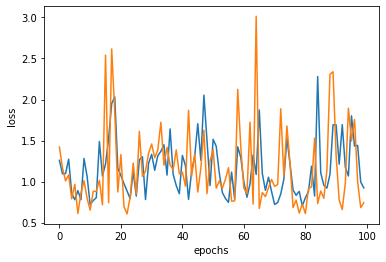

In [327]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [335]:
result=model.evaluate(X_val, y_val)
result

123/123 [==============================] - 0s 137us/step


[0.7427768893842774, 0.6666666865348816]

In [334]:
for i in range(len(model.metrics_names)):
    print('metrics',model.metrics_names[i], ':', round(result[i],2))

metrics loss : 0.74
metrics accuracy : 0.67
